Markov Chains are a way to describe processes that have multiple *states*. For instance, a circuit breaker may be either *closed* or *open*; a switch might be flipped to option *A*, *B*, or *C*. Each of these states has an associated probability of transitioning from one state to another state. For example, the circuit breaker might be *closed* 98% of the time, but it might be tripped by a power surge 2% of the time (transitioning from *closed* to *open*). Of course, in real life, the probability of a circuit breaker trip depends on other factors and is not entirely random. However, under the above assumption, we can build a "transition probability matrix" which describes the chance of transitioning from one state to another state:

[Image in blog post]

The "Markov" part of Markov Chains operates under the assumption that the value of the *next* state depends entirely on the *current* state. This assumption is also called the "memoryless" property, and it is usually made to simplify the mathematics involved. Violations of the memoryless property may occur when there is some change to the underlying process. Imagine that the circuit breaker no longer works correctly, opening even when the current is normal. In this case, a history of past behavior (circuit breaker has tripped 10 times in a row) may in fact be a good predictor of future behavior (circuit breaker will keep tripping). 

Since the history of the time spent in each state does not affect the future, it's much easier to predict the next state that the system will be in. The following code will implement a binary Markov Chain simulation (either "on" or "off") for an example system:

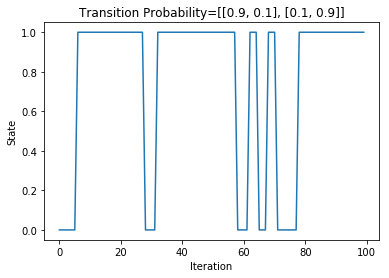

In [8]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Since the Markov assumption requires that the future 
# state only depends on the current state, we will keep
# track of the current state during each iteration.
# "0" is on, and "1" is off
def MarkovChainSim(t_prob, n_hist):
    cur_state = 0
    res = []
    for ii in n_hist:
        rn = random.random()
        # Different probabilities depending on the current 
        # state. (This could be done much more efficiently in
        # less lines of code, but I think this is clearer)
        if cur_state==0:
            # 90% chance to stay in the same state
            # See t_prob matrix
            if rn<=t_prob[0][0]:
                cur_state = 0
            # Since this is a "binary" Markov Chain, it must
            # be either one or the other state. "Else" is fine.
            else:
                cur_state = 1
        else:
            if rn<=t_prob[1][1]:
                cur_state = 1
            else:
                cur_state = 0
        # Save the results to an array
        res.append(cur_state)
    return res
# Transition probability matrix
# This is taken from the above image. The probability from
# On->On is 0.9, and from Off->Off is 0.9. The other 
# probabilities are inferred (both 0.1)
tpm = [[0.9, 0.1],[0.1, 0.9]]
# Run the Markov Chain simulation for num_hist iterations
num_hist = range(0,100)
# Run and plot the results
res = MarkovChainSim(tpm, num_hist)
plt.plot(res)
plt.title('Transition Probability=' + str(tpm))
plt.xlabel('Iteration')
plt.ylabel('State');

Looking at the above figure, several things are noticeable. First, the only possible values are 0 or 1; this is to be expected, of course, since we are working with a "binary" Markov Chain. Second, the simulation appears to spend a relatively long time in each state before transitioning to another state (i.e. the lines are very flat). This is because our probability of staying in the same state is 90%. What would you expect if this probability was modified to 50%? Let's find out.

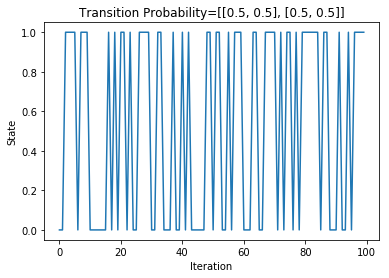

In [9]:
tpm2 = [[0.5, 0.5],[0.5, 0.5]]
# Run the Markov Chain simulation for num_hist iterations
num_hist2 = range(0,100)
# Run and plot the results
res2 = MarkovChainSim(tpm2, num_hist2)
plt.plot(res2)
plt.title('Transition Probability=' + str(tpm2))
plt.xlabel('Iteration')
plt.ylabel('State');

As you might have expected, the simulation jumps between each state much more often. 

What happens if there is actually a higher probability to change states than to stay in the same state? Why don't you run the MarkovChainSim function on your own and find out!